# Introduction

Here we will be doing a case study on Bellabeat, a high-tech manufacturer of health-focused
products for women. In this case, I will analyze smart device data from non-Bellabeat device to gain insights into how consumers are using their smart devices and then provide guide on marketing strategy for Bellabeat.

# 1. Ask
## Business Tasks
* Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices, and then apply these insights in improving one of Bellabeat products.

## Key stakeholders
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer;
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team;
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## Questions to guide the analysis
1) What are some trends in smart device usage?

2) How could these trends apply to Bellabeat customers?

3) How could these trends help influence Bellabeat marketing strategy?


# 2. Prepare

## Data Used
FitBit Fitness Tracker Data(CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. Individual reports can be parsed by export session ID (column A) or timestamp (column B).

## Problems with the data
These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. So it's relatively old and it is updated anually that also means data is not updated properly.
These datasets only contain information from thirty eligible Fitbit users, which is a quiet small sample size.
These datasets not include informations regarding users' age, gender, region, income level etc., which makes it not a perfect data source for BellaBeat, a women's focused company.

# 3. Process
I will be using R instead of the spreadsheet to analyze the data, since some reports are quite large in size.

Loading packages to set up the environment:
* tidyverse
* lubridate
* ggplot2

In [1]:
install.packages('tidyverse')
install.packages('lubridate')
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(lubridate)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### **Importing Data**

In [3]:
dailyActivity_merged = read_csv('/kaggle/input/bellabeat-datasets/dailyActivity_merged.csv')
sleepDay_merged = read_csv('/kaggle/input/bellabeat-datasets/sleepDay_merged.csv')
dailySteps_merged = read_csv('/kaggle/input/bellabeat-datasets/dailySteps_merged.csv')
hourlySteps_merged = read_csv('/kaggle/input/bellabeat-datasets/hourlySteps_merged.csv')
daily_Calories_merged = read_csv('/kaggle/input/bellabeat-datasets/dailyCalories_merged.csv')
weightLogInfo_merged = read_csv('/kaggle/input/bellabeat-datasets/weightLogInfo_merged.csv')
heatrate_seconds_merged = read_csv('/kaggle/input/bellabeat-datasets/heartrate_seconds_merged.csv')

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set

### **Previewing the datasets**

In [4]:
head(dailyActivity_merged)
head(sleepDay_merged)
head(dailySteps_merged)
head(hourlySteps_merged)
head(daily_Calories_merged)
head(weightLogInfo_merged)
head(heatrate_seconds_merged)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


### **Cleaning Data**

In [5]:
num_record_activity  = nrow(dailyActivity_merged) #940 records
num_record_activity

num_record_sleep = nrow(sleepDay_merged) #413 records
num_record_sleep

num_record_steps = nrow(dailySteps_merged) #940 records
num_record_steps

num_record_hourly_steps = nrow(hourlySteps_merged) # 22099 records
num_record_hourly_steps

num_record_calories = nrow(daily_Calories_merged) # 940 records
num_record_calories

num_record_weight = nrow(weightLogInfo_merged) # 67 records
num_record_weight

[1] 940

[1] 413

[1] 940

[1] 22099

[1] 940

[1] 67

**Found** : We found that weight log record and sleep record are less than the other records.

In [6]:
## Removing duplicates to check the number of participants
                           
dailyActivity = distinct(dailyActivity_merged, Id, ActivityDate, .keep_all = TRUE)
num_id_activity = nrow(distinct(dailyActivity, Id))
num_id_activity


dailySleep = distinct(sleepDay_merged, Id, SleepDay, .keep_all = TRUE)
num_id_sleep = nrow(distinct(dailySleep, Id))
num_id_sleep


dailyCalories = distinct(daily_Calories_merged, Id, ActivityDay, .keep_all = TRUE)
num_id_calories = nrow(distinct(dailyCalories, Id))
num_id_calories               

dailySteps = distinct(dailySteps_merged, Id, ActivityDay, .keep_all = TRUE)
num_id_steps = nrow(distinct(dailySteps, Id)) ##33
num_id_steps

hourlySteps = distinct(hourlySteps_merged, Id, ActivityHour, .keep_all = TRUE)
num_id_hourly_steps = nrow(distinct(hourlySteps, Id)) ##33
num_id_hourly_steps

weightLogInfo = distinct(weightLogInfo_merged, Id, Date, .keep_all = TRUE)
num_id_weight = nrow(distinct(weightLogInfo, Id)) ##8
num_id_weight

heartrate_seconds = distinct(heatrate_seconds_merged, Id, Time, .keep_all = TRUE)
num_id_heartrate = nrow(distinct(heatrate_seconds_merged, Id))##14
num_id_heartrate


[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

[1] 8

[1] 14

In [7]:
#Checking NA's and will identify data that we will not use due to NA's
colSums(is.na(dailyActivity))
colSums(is.na(dailySleep))
colSums(is.na(dailyCalories))
colSums(is.na(hourlySteps))
colSums(is.na(weightLogInfo))
colSums(is.na(heartrate_seconds))  # We found 65 NAs in column Fat, this column is not usable so far

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
                 0                  0                  0                  0 
    TotalTimeInBed 
                 0

Id ActivityDay    Calories 
          0           0           0

Id ActivityHour    StepTotal 
           0            0            0

Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0              0

Id  Time Value 
    0     0     0

**Found** : Found out there are 65 NAs in column "Fat" in dataframe weightLogInfo, and totally there's only 67 records in this table, thus "Fat" column is not usable so far.



In [8]:
### Reformat, make sure the Date/Time all sharing the same format, the same column name; and adding column Day 
daily_activity = dailyActivity %>%
    rename(Date = ActivityDate) %>%
    mutate(Date = as.Date(Date, format = "%m/%d/%Y" )) %>%
    mutate(Day = weekdays(Date)) #creating Day column for weekdays 
head(daily_activity)


daily_sleep = dailySleep %>%
    rename(Date = SleepDay) %>%
    mutate(Date = as.Date(Date, format = "%m/%d/%Y")) %>%
    mutate(Day = weekdays(Date))
head(daily_sleep)


daily_calorie = dailyCalories %>%
    rename(Date = ActivityDay) %>%
    mutate(Date = as.Date(Date, format = "%m/%d/%Y")) %>%
    mutate(Day = weekdays(Date))
head(daily_calorie)


weight_log = weightLogInfo %>%
    mutate(Date = as.Date(Date, format = "%m/%d/%Y")) %>%
    mutate(Day = weekdays(Date))

head(weight_log)


daily_steps = dailySteps %>%
    rename(Date = ActivityDay) %>%
    rename(TotalSteps = StepTotal) %>%
    mutate(Date = as.Date(Date, format = "%m/%d/%Y" )) %>%
    mutate(Day = weekdays(Date))
head(daily_steps)

hourly_steps <- hourlySteps %>% 
  rename(DateTime = ActivityHour) %>%
  rename(TotalSteps = StepTotal)%>%
  mutate(DateTime = format(as.POSIXct(DateTime,format='%m/%d/%Y %I:%M:%S %p'), format='%Y-%m-%d %H:%M:%S'))
head(hourly_steps)

Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,Tuesday
1503960366,2016-04-13,2,384,407,Wednesday
1503960366,2016-04-15,1,412,442,Friday
1503960366,2016-04-16,2,340,367,Saturday
1503960366,2016-04-17,1,700,712,Sunday
1503960366,2016-04-19,1,304,320,Tuesday


Id,Date,Calories,Day
<dbl>,<date>,<dbl>,<chr>
1503960366,2016-04-12,1985,Tuesday
1503960366,2016-04-13,1797,Wednesday
1503960366,2016-04-14,1776,Thursday
1503960366,2016-04-15,1745,Friday
1503960366,2016-04-16,1863,Saturday
1503960366,2016-04-17,1728,Sunday


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Day
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12,Monday
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,Tuesday
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,Wednesday
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,Thursday
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,Thursday
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12,Sunday


Id,Date,TotalSteps,Day
<dbl>,<date>,<dbl>,<chr>
1503960366,2016-04-12,13162,Tuesday
1503960366,2016-04-13,10735,Wednesday
1503960366,2016-04-14,10460,Thursday
1503960366,2016-04-15,9762,Friday
1503960366,2016-04-16,12669,Saturday
1503960366,2016-04-17,9705,Sunday


Id,DateTime,TotalSteps
<dbl>,<chr>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


# 4. Analyze & Share

* Now we will analyze people's average activity level through out the whole tracking period

Based on paper "How many steps/day are enough? Preliminary pedometer indices for public health", classify individuals into different activity level:

* Sedentary
* Low Active
* Somewhat Active
* Active
* Highly Active

Paper's Link: https://pubmed.ncbi.nlm.nih.gov/14715035/

In [9]:
daily_steps_summary<- daily_steps %>%
  group_by(Id) %>%
  summarise(avg_steps_daily = mean(TotalSteps))

daily_steps_summary <- daily_steps_summary %>%
  mutate(active_level = case_when(.$avg_steps_daily < 5000 ~ "Sedentary",
                                  .$avg_steps_daily < 7499 ~ "Low Active",
                                  .$avg_steps_daily < 9999 ~ "Somewhat Active",
                                  .$avg_steps_daily < 12500 ~ "Active",
                                  .$avg_steps_daily >= 12500 ~ "Highly Active"))

daily_steps_summary$active_level <- factor(daily_steps_summary$active_level, levels = c("Sedentary", "Low Active", "Somewhat Active", "Active", "Highly Active"))

daily_steps_summary


Id,avg_steps_daily,active_level
<dbl>,<dbl>,<fct>
1503960366,12116.742,Active
1624580081,5743.903,Low Active
1644430081,7282.967,Low Active
1844505072,2580.065,Sedentary
1927972279,916.129,Sedentary
2022484408,11370.645,Active
2026352035,5566.871,Low Active
2320127002,4716.871,Sedentary
2347167796,9519.667,Somewhat Active


#### **Converting Char data type to factor**

A factor is a categorical variable, which means that it can only take on a limited number of values. In this case, the possible values for the active_level variable are "Sedentary", "Low Active", "Somewhat Active", "Active", and "Highly Active".

The factor() function takes two arguments: the first argument is the variable that you want to convert to a factor, and the second argument is a vector of the possible values for the variable. In this case, the second argument is a vector of strings, which is why the factor() function is able to convert the active_level variable to a factor.

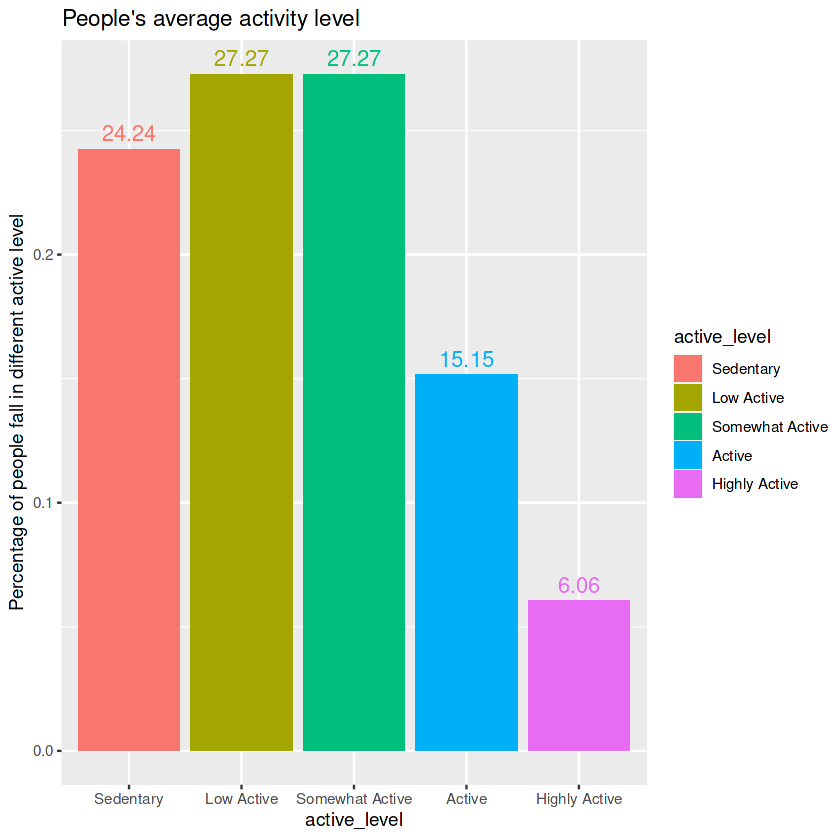

In [10]:
TotalPeople = nrow(daily_steps_summary) #33


daily_steps_summary %>%
    group_by(active_level) %>%
    summarise(people_each_active_level = n(),
             percentage = people_each_active_level/TotalPeople) %>%
ggplot(mapping = aes(x = active_level, y = percentage, fill = active_level)) + 
geom_col() +
  geom_text(aes(label= round(percentage, digits = 4)*100, color = active_level), vjust= -0.5, size= 4.5) +
labs(title= "People's average activity level") +
  ylab("Percentage of people fall in different active level")


**Found:** There are less highly active peoples

Now we will analyze people's average steps taken through out a day, to see when they are most active and get the most excercise done.

In [11]:
hourly_steps = hourly_steps %>%
    separate(DateTime, c('Date', 'Time'), sep = ' ')

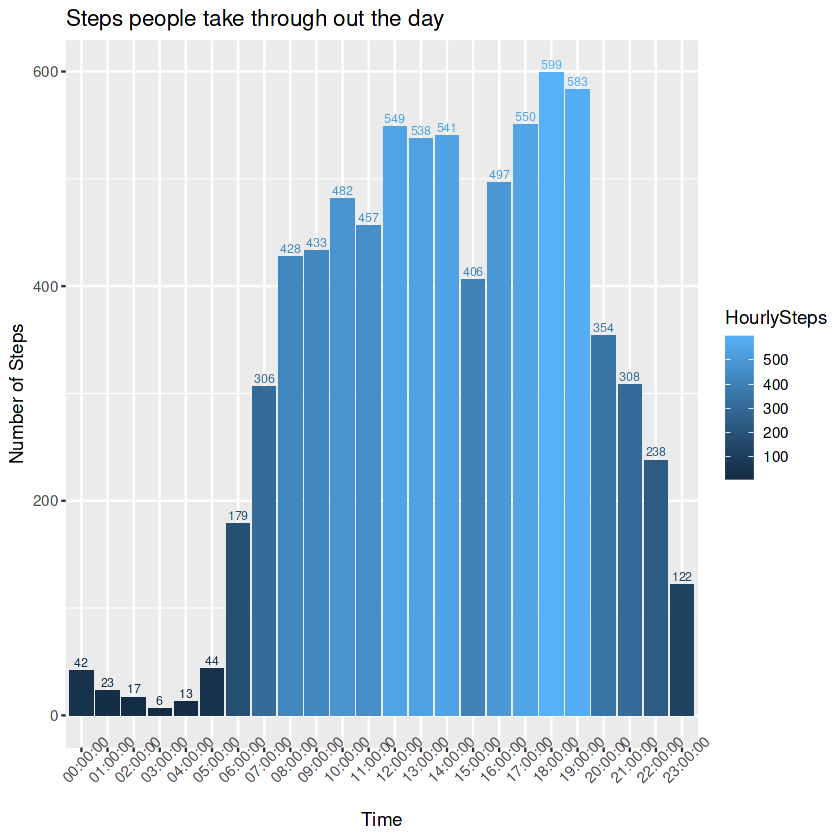

In [12]:
hourly_steps %>% 
  group_by(Time) %>%
  summarise(HourlySteps = mean(TotalSteps)) %>%
  ggplot(mapping = aes(x = Time, y = HourlySteps, fill = HourlySteps)) +
  geom_col() + 
  theme(axis.text.x = element_text(angle = 45))+
  geom_text(aes(label= round(HourlySteps, digits = 0), color = HourlySteps), vjust= -0.4, size= 2.5) +
  labs(title= "Steps people take through out the day") +
  ylab("Number of Steps")

**Found:** There are two peak active time period, one is 11:00 ~ 13:00, the other is 16:00 ~ 18:00.

* Now we will analyze whether there's a relationship between different week days and people's activity level by steps people take that day.

Day,avg_step
<chr>,<dbl>
Friday,7448.230
Monday,7780.867
Saturday,8152.976
Sunday,6933.231
Thursday,7405.837
Tuesday,8125.007
Wednesday,7559.373


Day,avg_step
<fct>,<dbl>
Friday,7448.230
Monday,7780.867
Saturday,8152.976
Sunday,6933.231
Thursday,7405.837
Tuesday,8125.007
Wednesday,7559.373


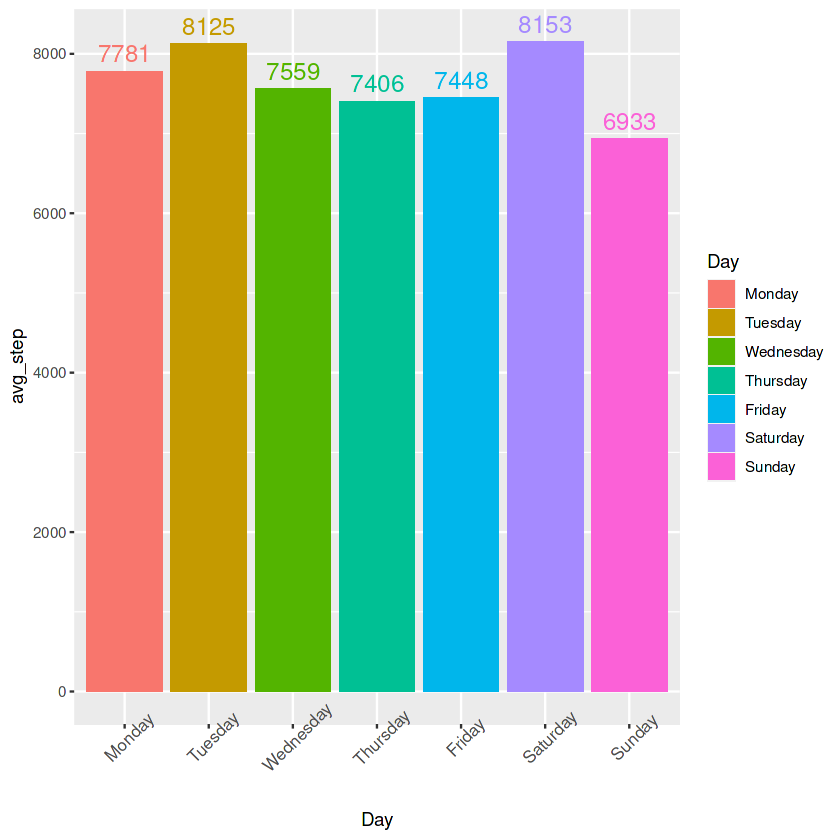

In [13]:
step_by_days = daily_steps %>%
    group_by(Day) %>%
    summarise(avg_step = mean(TotalSteps))
View(step_by_days)


#Converting chr to factor 
step_by_days$Day = factor(step_by_days$Day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
View(step_by_days)


#plot
ggplot(data = step_by_days, mapping = aes(x = Day, y = avg_step, fill = Day)) +
geom_col() +
geom_text(aes(label = round(avg_step, digit = 0), color = Day), vjust = -0.5, size = 5) +
theme(axis.text.x = element_text(angle = 45, size = 10))

**Found**: There is not much difference from Monday to Sunday, just people tends to relax bit more on sunday

* Now we will analyze whether people's daily step changes along with wearing fitbit tracker

Date,avg_step_change
<date>,<dbl>
2016-04-12,8236.848
2016-04-13,7198.727
2016-04-14,7743.576
2016-04-15,7533.848
2016-04-16,8679.156
2016-04-17,6409.250


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


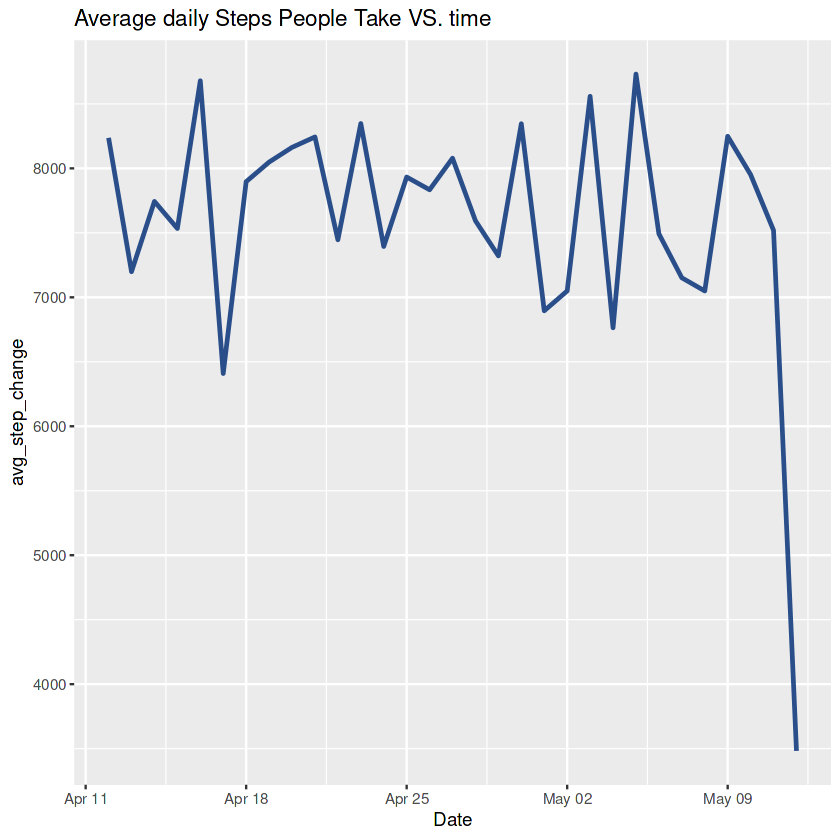

In [14]:
steps_change = daily_steps %>%
    group_by(Date) %>%
    summarise(avg_step_change = mean(TotalSteps))
head(steps_change)


#Plotting
ggplot(data = steps_change) + geom_line(mapping = aes(x = Date, y = avg_step_change), color="#143d80", size=1, alpha=0.9) +
labs(title= "Average daily Steps People Take VS. time ")

**Found:** When people first start using a Fitbit tracker, they are excited about tracking their steps and becoming more active. This excitement often leads to an increase in the number of steps they take in the first few days or weeks of using the tracker. However, over time, this excitement can wear off and people may start to become less motivated to exercise. This is why the average daily steps of people who use Fitbit trackers often decreases over time.

If Fitbit wants to keep people motivated to exercise, they need to find ways to keep their excitement levels high. One way to do this is to make the tracker more fun to use. For example, they could add new features that make it more challenging or rewarding to track steps. They could also offer incentives, such as discounts on products or services, for people who reach certain step goals.


**Suggest:** Do a suvey in users to understand if there's anything in product we can improve.



* Now we will analyze whether there is any relationship between daily steps and calories

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


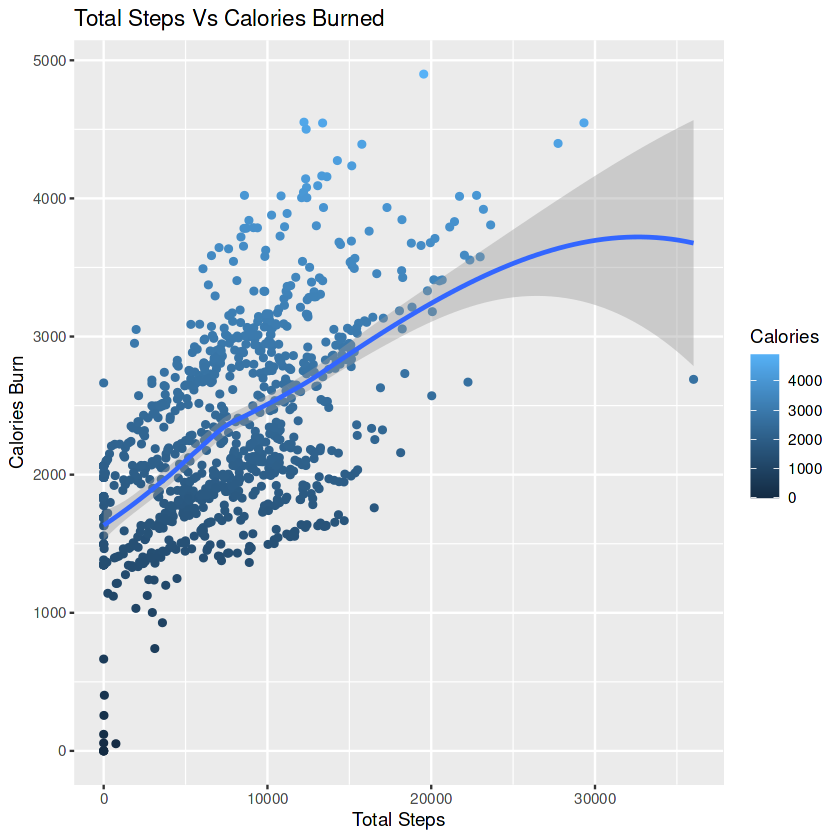

In [15]:
ggplot(data = daily_activity, mapping = aes(x = TotalSteps, y = Calories, color = Calories)) +
       geom_point() +
       geom_smooth(method = 'loess') +
       labs(title = "Total Steps Vs Calories Burned", x = "Total Steps", y = "Calories Burn")

**Found:** We have found that there is a positive relationship between Total Steps and Calorie Burned and we have also found there are some people who has burned 0 calories which does not make sense to me. So we will search for this records

In [16]:
## There are some people literally burnt 0 calories a day, that doesn't make sense to me.
## So I searched for such records:

ppl_burn_zero_cal = filter(daily_activity, Calories == 0)
ppl_burn_zero_cal


## Found out while people have a sedentary time as long as the whole day, their calories burnt is 0
## So I made a wild assumption that people have 0 calories burnt, actually forget to wear their device. 
## So to confirm my theory, I decide to check people's heart rate records and their sleep records


#First we will check if there is any record in sleep data for the people who has burned zero calories by joining ppl_burn_zero_cal dataframe and daily_sleep dataframe which have sleep reocords for peoples

ppl_burn_zero_vs_sleep = ppl_burn_zero_cal %>%
    left_join(daily_sleep, by = c("Id", "Date"))
head(ppl_burn_zero_vs_sleep)


# Found people burnt 0 calories a day also don't have sleep record that day.

### Second we will check: Heart rate dataframe and ppl_burn_zero_cal dataframe

people_list_heart_rate = distinct(heartrate_seconds, Id)
head(people_list_heart_rate)


ppl_burn_zero_cal$coincidence = ppl_burn_zero_cal$Id %in% people_list_heart_rate$Id
ppl_burn_zero_cal


 

Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-05-12,0,0,0,0,0,0,0,0,0,0,0,1440,0,Thursday
6290855005,2016-05-10,0,0,0,0,0,0,0,0,0,0,0,1440,0,Tuesday
8253242879,2016-04-30,0,0,0,0,0,0,0,0,0,0,0,1440,0,Saturday
8583815059,2016-05-12,0,0,0,0,0,0,0,0,0,0,0,1440,0,Thursday


Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day.x,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day.y
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-05-12,0,0,0,0,0,0,0,0,0,0,0,1440,0,Thursday,NA,NA,NA,NA
6290855005,2016-05-10,0,0,0,0,0,0,0,0,0,0,0,1440,0,Tuesday,NA,NA,NA,NA
8253242879,2016-04-30,0,0,0,0,0,0,0,0,0,0,0,1440,0,Saturday,NA,NA,NA,NA
8583815059,2016-05-12,0,0,0,0,0,0,0,0,0,0,0,1440,0,Thursday,NA,NA,NA,NA


Id
<dbl>
2022484408
2026352035
2347167796
4020332650
4388161847
4558609924


Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,coincidence
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1503960366,2016-05-12,0,0,0,0,0,0,0,0,0,0,0,1440,0,Thursday,FALSE
6290855005,2016-05-10,0,0,0,0,0,0,0,0,0,0,0,1440,0,Tuesday,FALSE
8253242879,2016-04-30,0,0,0,0,0,0,0,0,0,0,0,1440,0,Saturday,FALSE
8583815059,2016-05-12,0,0,0,0,0,0,0,0,0,0,0,1440,0,Thursday,FALSE


Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,active_hours
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,0.42
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,0.35
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday,0.50
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,0.48
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,0.60
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,0.63


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


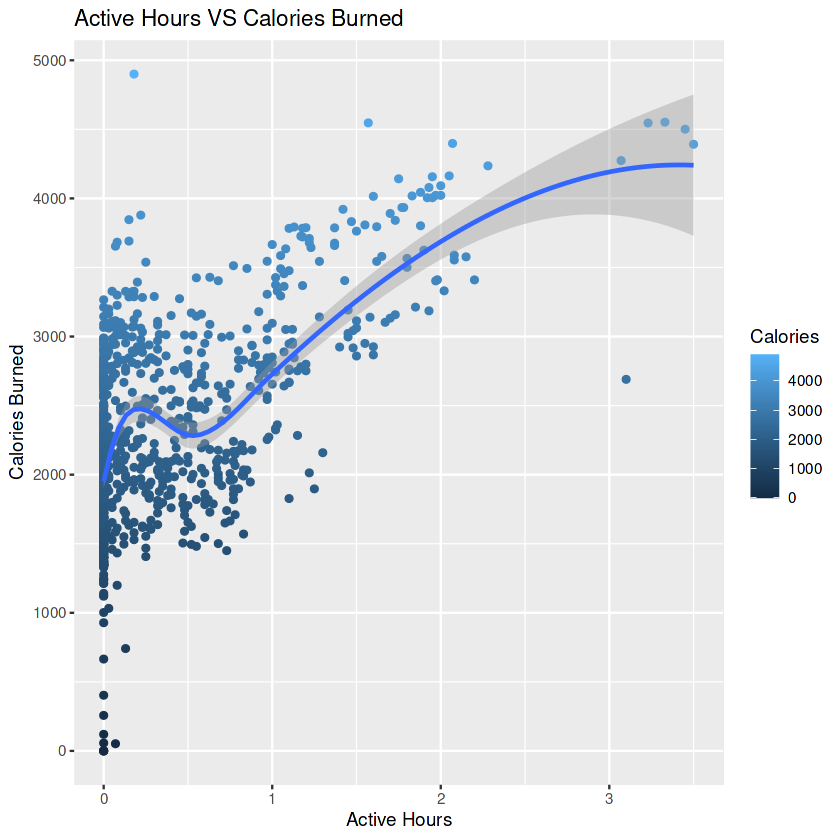

In [17]:
#Checking the relationship between active hours and calories burnt

daily_activity = daily_activity %>%  #Creating column for active hour
  mutate(active_hours = round(as.numeric(VeryActiveMinutes) / 60, 2))
head(daily_activity)

daily_activity %>%
  mutate(active_hours = round(as.numeric(VeryActiveMinutes) / 60, 2)) %>%
  ggplot(data = ., mapping = aes(x = active_hours, y = Calories, color = Calories)) +
  geom_point() +
  geom_smooth(method = 'loess') +
  labs(title = "Active Hours VS Calories Burned", x = "Active Hours", y = "Calories Burned")


**Found:** People burnt 0 calories a day neither have heart rate record nor sleep record that day, which means they most likely not wearing the device. And some people burnt too little of caloriee, eg 400Cal , because they only were wearing it 10 or 20 miuntes a day. We also found one outlier that is at 4800 calories burnt arround 0.2 hours which might me due to some reason 


**Reason of Outlier**
* The person may have been engaging in a very intense activity, such as sprinting or weightlifting.
* The person may have been overweight or obese, which would have increased the number of calories they burned.
* The person may have been wearing a fitness tracker that was not accurate.
* There may have been a measurement error in the data.

**Suggest:** We should develop device that people can wear comfortably during sleep, bath, etc.


**Found:** That the algorithm in tracker never considered the sleeping time. We only have 1440 mins in 24h, so if we wear the device while sleeping for 8 hours, this period of time shouldn't call as sedentary time. And such numbers on the tracker would give customer a bad impression that the tracker is not accurate. 

**Suggest:** Check BellaBeat's algorithm, to see if we made the same mistake and fix the problem.

* Now we will analyze whether there's a relationship between activity level and sleep quality .(whether enough sleep would lead to more activity/more activity would lead to better sleep)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day.x,active_hours,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day.y
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,13,328,728,1985,Tuesday,0.42,1,327,346,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,19,217,776,1797,Wednesday,0.35,2,384,407,Wednesday
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,34,209,726,1745,Friday,0.48,1,412,442,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,10,221,773,1863,Saturday,0.60,2,340,367,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,20,164,539,1728,Sunday,0.63,1,700,712,Sunday
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,31,264,775,2035,Tuesday,0.83,1,304,320,Tuesday


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


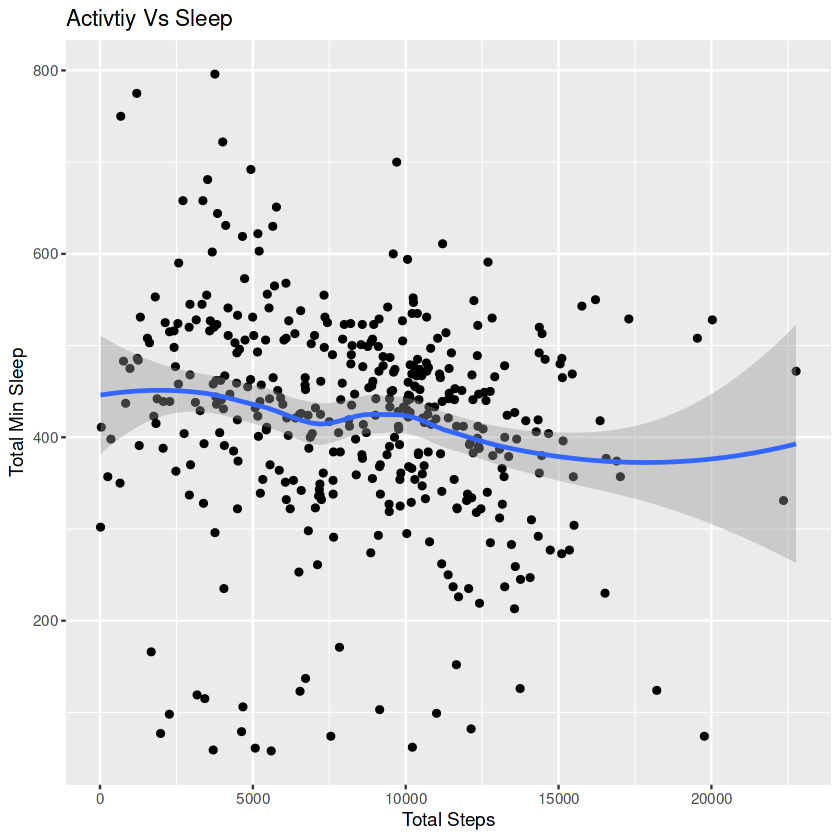

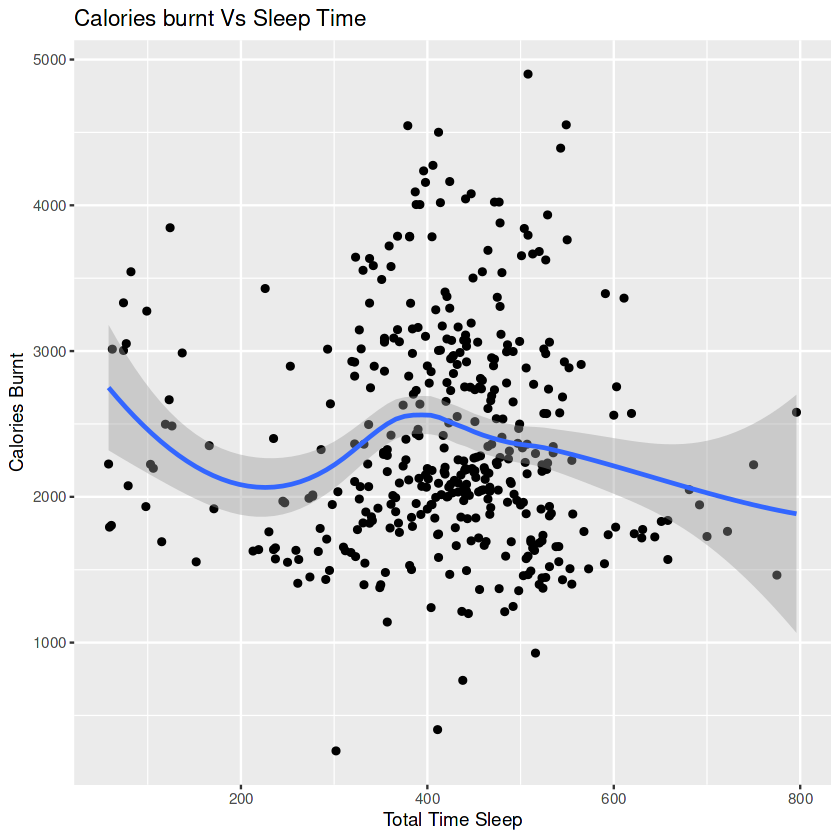

In [18]:
## Check relationship between activity and sleep, calories and sleep
#Plotting Activity vs Sleep
activity_vs_sleep = merge(daily_activity, daily_sleep, by = c("Id", "Date"))
head(activity_vs_sleep)

ggplot(activity_vs_sleep, mapping = aes(x = TotalSteps, y = TotalMinutesAsleep)) +
geom_point() + 
geom_smooth(method = 'loess') +
labs(title = "Activtiy Vs Sleep", x = 'Total Steps', y = 'Total Min Sleep')


#Plotting calories vs sleep

ggplot(data = activity_vs_sleep, mapping = aes(x = TotalMinutesAsleep, y = Calories)) +
geom_point() +
geom_smooth(method = 'loess') +
labs(title = 'Calories burnt Vs Sleep Time', x = 'Total Time Sleep', y = 'Calories Burnt')




**Found:** No clear relationship between sleep and steps people take daily

**Found:** No clear relationship between sleep and calories people burnt daily

* Now we will analyze average calories burnt change with the time pass

Date,avg_calories_burnt_per_person
<date>,<dbl>
2016-04-12,2390.697
2016-04-13,2286.636
2016-04-14,2356.394
2016-04-15,2355.182
2016-04-16,2392.938
2016-04-17,2230.969


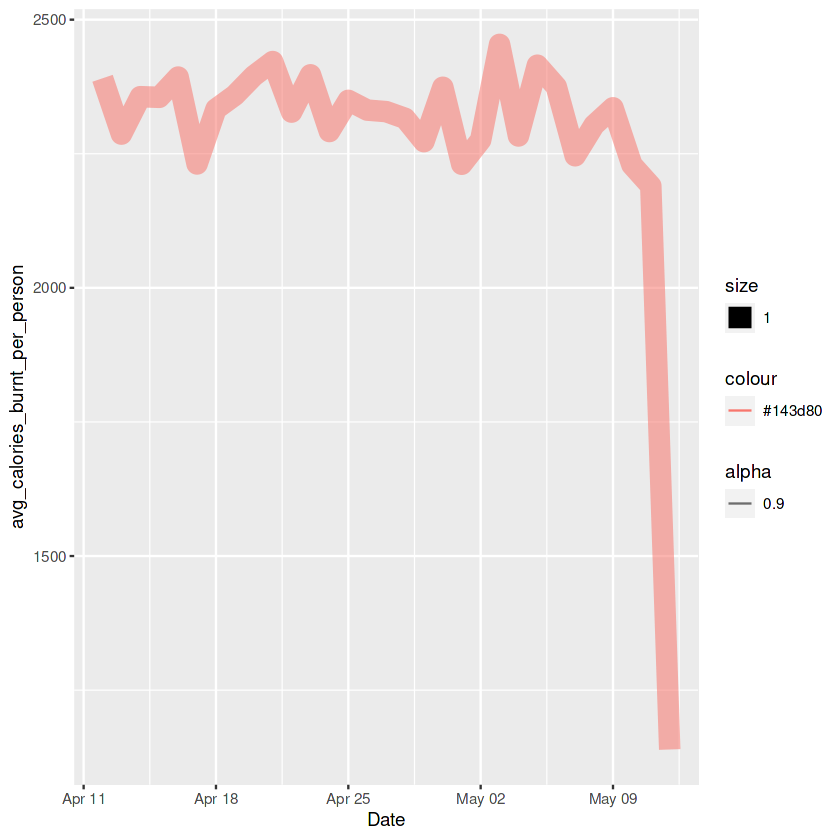

In [19]:
calories_change = daily_calorie %>%
    group_by(Date) %>%
    summarise(avg_calories_burnt_per_person = mean(Calories))
head(calories_change)


ggplot(data = calories_change, mapping = aes(x = Date, y = avg_calories_burnt_per_person, color="#143d80", size=1, alpha=0.9)) +
  geom_line()


**Found:** Not much of change, however people's average daily calories burnt jumps down by the end of the tracking period. So may be by the end of the tracking period, people just don't bother to wear the tracker. It also may indicate that after 2 month period, people still haven't built the habit of using the tracker.

In [20]:
weight_log %>%
  group_by(Id) %>%
  summarise(number_of_record = n(), manual = sum(IsManualReport), fat = mean(Fat, na.rm=TRUE))

Id,number_of_record,manual,fat
<dbl>,<int>,<int>,<dbl>
1503960366,2,2,22
1927972279,1,0,NaN
2873212765,2,2,NaN
4319703577,2,2,25
4558609924,5,5,NaN
5577150313,1,0,NaN
6962181067,30,30,NaN
8877689391,24,0,NaN


**Found:**

* Only 8 out of 33 users have logged their weight for at least 1 time
* Only 3 people have the habit to log their weight at least 1 time per week
* Only 1 people have the habit to log weight
* Only 2 people have record their body fat, which highly possible means most of people don't have smart scales at home
* Most users manually report their weight, this might be the reason why people don't like to log their weight

**Suggest:**

1. Develop smart scale which can measure people's body fat, skeletal muscle, bone mass, BMR, BMI, etc.
1. Connect that scale with our wearable device, automatically log people's weight, fat, BMI, etc.
1. Remind people to stand on the scale every week at the same time.

* Now we will analyze sleep data

In [21]:
head(daily_sleep)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,Tuesday
1503960366,2016-04-13,2,384,407,Wednesday
1503960366,2016-04-15,1,412,442,Friday
1503960366,2016-04-16,2,340,367,Saturday
1503960366,2016-04-17,1,700,712,Sunday
1503960366,2016-04-19,1,304,320,Tuesday


Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day,TimeAwake,Sleep_Level
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
1503960366,2016-04-12,1,327,346,Tuesday,19,Need more sleep
1503960366,2016-04-13,2,384,407,Wednesday,23,Need more sleep
1503960366,2016-04-15,1,412,442,Friday,30,Need more sleep
1503960366,2016-04-16,2,340,367,Saturday,27,Need more sleep
1503960366,2016-04-17,1,700,712,Sunday,12,Too much Sleep
1503960366,2016-04-19,1,304,320,Tuesday,16,Need more sleep


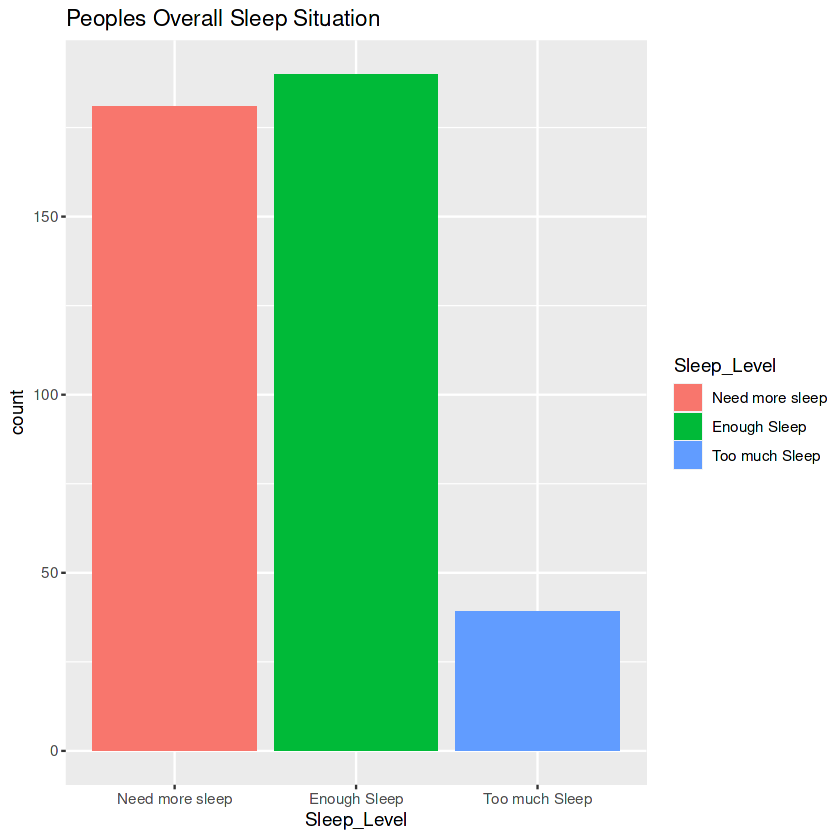

In [22]:
daily_sleep_v1 = daily_sleep %>%
    mutate(TimeAwake = TotalTimeInBed - TotalMinutesAsleep) %>%
    mutate(Sleep_Level = case_when(.$TotalMinutesAsleep < 420 ~ 'Need more sleep',
                                   .$TotalMinutesAsleep >= 420 & TotalMinutesAsleep < 540 ~ 'Enough Sleep',
                                   .$TotalMinutesAsleep >= 540 ~ 'Too much Sleep'))

daily_sleep_v1$Sleep_Level = factor(daily_sleep_v1$Sleep_Level, levels = c("Need more sleep", "Enough Sleep", "Too much Sleep"))

head(daily_sleep_v1)


ggplot(data = daily_sleep_v1, mapping = aes(x = Sleep_Level, fill = Sleep_Level)) + 
geom_bar() +
labs(title = 'Peoples Overall Sleep Situation')






Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day,TimeAwake,Sleep_Level
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
1503960366,2016-04-12,1,327,346,Tuesday,19,Need more sleep
1503960366,2016-04-13,2,384,407,Wednesday,23,Need more sleep
1503960366,2016-04-15,1,412,442,Friday,30,Need more sleep
1503960366,2016-04-16,2,340,367,Saturday,27,Need more sleep
1503960366,2016-04-17,1,700,712,Sunday,12,Too much Sleep
1503960366,2016-04-19,1,304,320,Tuesday,16,Need more sleep


Id,nights_of_insomnia,nights_observed,avg_asleep,avg_inbed,avg_time_awake,avg_sleep_percentage,enough_sleep,insomnia
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1503960366,0,25,360.2800,383.2000,22.92000,0.9401879,TRUE,FALSE
1644430081,1,4,294.0000,346.0000,52.00000,0.8497110,FALSE,FALSE
1844505072,3,3,652.0000,961.0000,309.00000,0.6784599,TRUE,TRUE
1927972279,0,5,417.0000,437.8000,20.80000,0.9524897,TRUE,FALSE
2026352035,0,28,506.1786,537.6429,31.46429,0.9414773,TRUE,FALSE
2320127002,0,1,61.0000,69.0000,8.00000,0.8840580,FALSE,FALSE


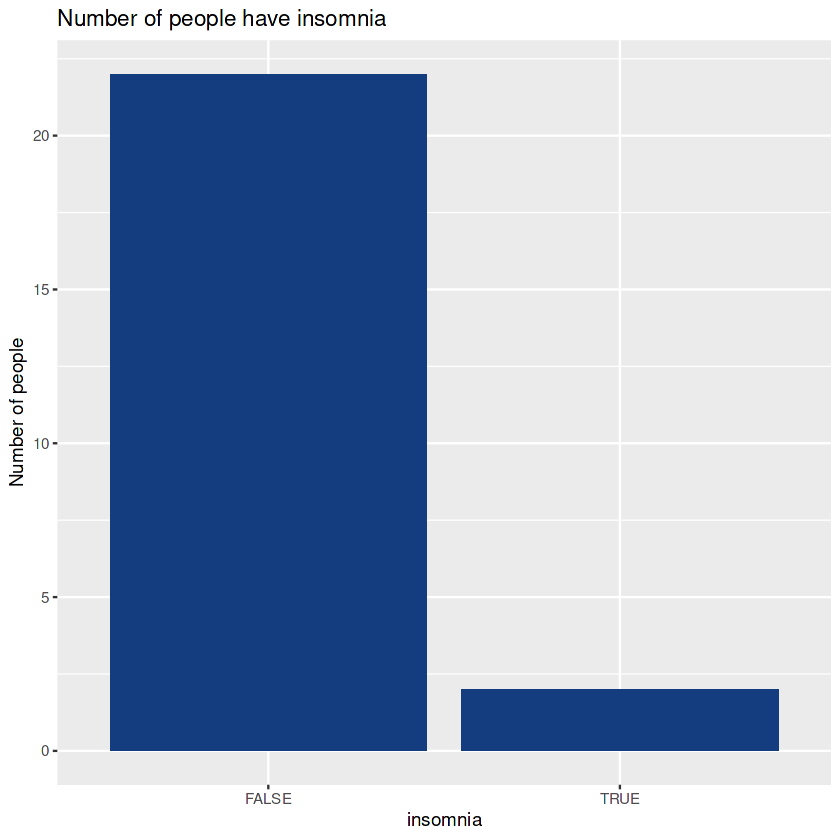

Id,nights_of_insomnia,nights_observed,avg_asleep,avg_inbed,avg_time_awake,avg_sleep_percentage,enough_sleep,insomnia
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1503960366,0,25,360.2800,383.2000,22.920000,0.9401879,TRUE,FALSE
1644430081,1,4,294.0000,346.0000,52.000000,0.8497110,FALSE,FALSE
1844505072,3,3,652.0000,961.0000,309.000000,0.6784599,TRUE,TRUE
1927972279,0,5,417.0000,437.8000,20.800000,0.9524897,TRUE,FALSE
2026352035,0,28,506.1786,537.6429,31.464286,0.9414773,TRUE,FALSE
2320127002,0,1,61.0000,69.0000,8.000000,0.8840580,FALSE,FALSE
2347167796,0,15,446.8000,491.3333,44.533333,0.9093623,TRUE,FALSE
3977333714,28,28,293.6429,461.1429,167.500000,0.6367720,FALSE,TRUE
4020332650,0,8,349.3750,379.7500,30.375000,0.9200132,FALSE,FALSE


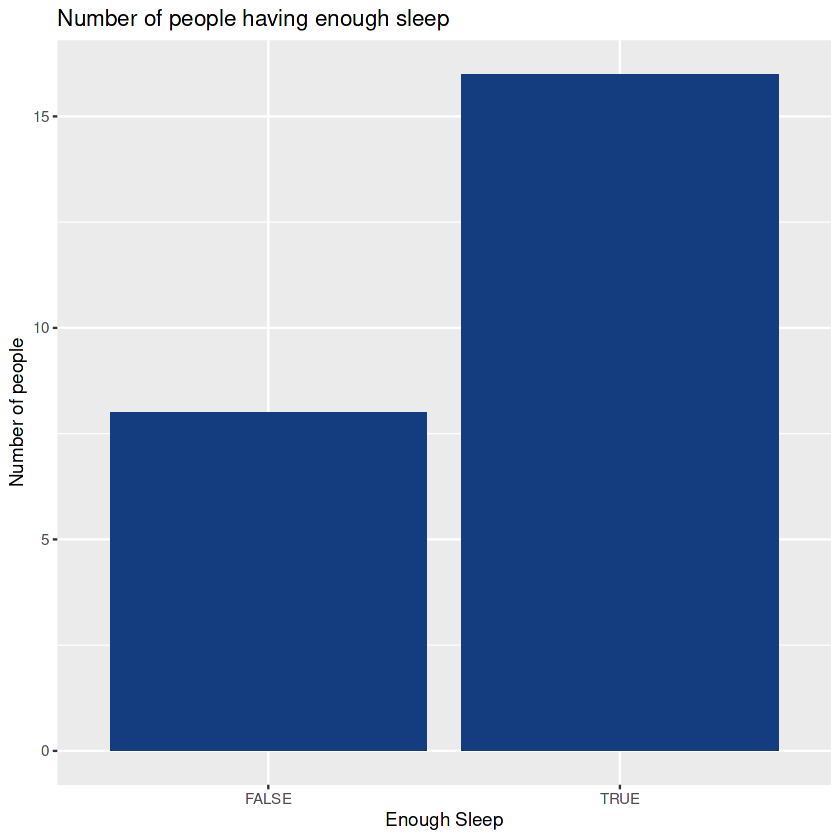

In [23]:
## Checking users' overall sleep quantity and quality

head(daily_sleep_v1)

sleep_summary <- daily_sleep_v1 %>%
  group_by(Id) %>%
  summarise(
            nights_of_insomnia = sum(TimeAwake >=90),
            nights_observed = n(),
            avg_asleep = mean(TotalMinutesAsleep), 
            avg_inbed = mean(TotalTimeInBed), 
            avg_time_awake = avg_inbed - avg_asleep,
            avg_sleep_percentage =(avg_asleep / avg_inbed)) %>%
  mutate(enough_sleep = ifelse( avg_asleep < 360, FALSE, TRUE)) %>%
  mutate(insomnia = ifelse(avg_sleep_percentage < 0.8 & nights_of_insomnia/nights_observed > 0.4, TRUE,FALSE))


head(sleep_summary)

ggplot(data = sleep_summary) +
  geom_bar(mapping = aes(x = insomnia),  fill="#143d80") +
  labs(title = "Number of people have insomnia" ) +
  ylab("Number of people") 



ggplot(data = sleep_summary) +
geom_bar(mapping = aes(x = enough_sleep), fill = "#143d80") +
labs(title = "Number of people having enough sleep") +
xlab("Enough Sleep") +
ylab("Number of people") 



sleep_summary 
            

**Found:** 
* **24 people have used a Fitbit to track their sleep.** This is a small number of people, but it is a good start.
* **1/4 of people take their Fitbit off when they sleep.** This is a problem, because it means that the data from these people is not accurate.
* **6 out of 24 people sleep too little.** This means that they are not getting enough sleep, which can lead to health problems.
* **The number of sleep records is half the number of other records.** This means that people are not using their Fitbit to track their sleep as often as they could.
* **Only 2 people have 31 days of sleep record.** This means that most people are not tracking their sleep regularly.
* **Based on the assumption that people are in bed to sleep, and not to read or use their phone, I found out that 2 people have insomnia.** Insomnia is a sleep disorder that can cause people to have trouble falling asleep, staying asleep, or waking up too early.

**Possible Cause:**

* The tracker is not comfortable to wear.
* People don't know they need to wear it during sleep
* Tracker is not water proof, so people take it off during face washing or bath and forget to put it back on.
* The data recorded by tracker is not accurate and detailed enough, so people feel there's no need to wear it and track the sleep data.

**Suggest:**

* Do a suvey to see why people don't like to wear the fitbit tracker while sleep.
* Make our device comfortable and water-proof.
* Check to see if our tracker can provide accurate and detailed tracking records.
* Having doctor's consultation service options in our app, so it's much easier for user seeking help, and with the data we recorded, the doctor would give better solution.
* Implement functions into our wearable device to play white noise for people who haven't fall asleep in 30 mins

# 5. Act

1. Do a suvey to find out the reason why people purchased the product, why they forget to wear the fitbit tracker, and what are some defects the current fitbit tracker have would influence them to become a loyal customer.
1. Based on the suvey, improve our device, inicluding algorithm, function, and outside design (eg. comfortable to wear and water-proof)
1. Develop new product like smart scale to couple with our tracker.
1. Having doctor's consultation service options in our app for our users to seek for help from the professionals. It's a way to retain customers.
1. Implement functions into our wearable device: play white noise for people who haven't fall asleep in 30 mins; remind people to go to bed at a proper time.
1. Towards marketing, I would recommend company put more advertisement in Youtube/instagram/TV, since 1/3 of the days,people are living a sedentary life style, and towards the people who go to the gym, we can do campain there, add posters.
1. Towards content in advertisement, I would recommend company use the information we get from suvey, to highlight the defects of other tracker brand, and make the audience know that our products are different.